_______________________________________________________________________________________

Digite "dij" para observar a menor distancia de um setor para os outros.
Digite "dijpath" para menor distancia de 
quit
_______________________________________________________________________________________
Selecione Qual Operação deseja realizar 
dij
A partir de Qual estação
Largada
['Largada']
['Largada', 'SetorA']
['Largada', 'SetorA', 'SetorH']
['Largada', 'SetorA', 'SetorH', 'SetorE']
['Largada', 'SetorA', 'SetorH', 'SetorE', 'SetorI']
['Largada', 'SetorA', 'SetorH', 'SetorE', 'SetorI', 'SetorF']
['Largada', 'SetorA', 'SetorH', 'SetorE', 'SetorI', 'SetorF', 'SetorG']
['Largada', 'SetorA', 'SetorH', 'SetorE', 'SetorI', 'SetorF', 'SetorG', 'SetorJ']
['Largada', 'SetorA', 'SetorH', 'SetorE', 'SetorI', 'SetorF', 'SetorG', 'SetorJ', 'SetorB']
['Largada', 'SetorA', 'SetorH', 'SetorE', 'SetorI', 'SetorF', 'SetorG', 'SetorJ', 'SetorB', 'SetorC']
['Largada', 'SetorA', 'SetorH', 'SetorE', 'SetorI', 'Se

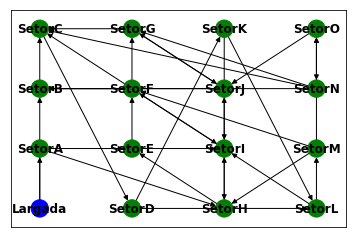

<Figure size 1080x1080 with 0 Axes>

_______________________________________________________________________________________

Digite "dij" para observar a menor distancia de um setor para os outros.
Digite "dijpath" para menor distancia de 
quit
_______________________________________________________________________________________
Selecione Qual Operação deseja realizar 
dijpath
A partir de Qual estação
Largada
Qual a estação final
SetorC
{'SetorA': 4}
{'SetorA': 4, 'SetorB': 6}
{'SetorB': 6, 'SetorH': 14}
{'SetorB': 6, 'SetorH': 14, 'SetorE': 5}
{'SetorB': 6, 'SetorH': 14, 'SetorF': 8}
{'SetorB': 6, 'SetorH': 14, 'SetorF': 8, 'SetorI': 8}
{'SetorH': 14, 'SetorF': 8, 'SetorI': 8, 'SetorC': 8}
{'SetorH': 14, 'SetorI': 8, 'SetorC': 8, 'SetorG': 15}
{'SetorH': 14, 'SetorC': 8, 'SetorG': 15, 'SetorJ': 10}
{'SetorH': 14, 'SetorG': 15, 'SetorJ': 10, 'SetorD': 18}
{'SetorH': 14, 'SetorG': 11, 'SetorD': 18}
{'SetorK': 28}
{'SetorK': 28, 'SetorL': 19}
{'SetorK': 28, 'SetorM': 22}
{'SetorK': 28, 'SetorO': 24}
{'SetorK': 28, 'Setor

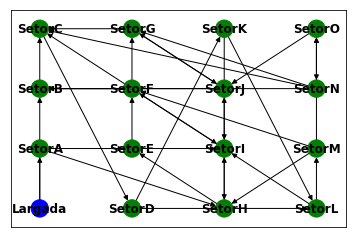

<Figure size 1080x1080 with 0 Axes>

A menor distância de Largada atá SetorC é: 8 Kilometros
O menor caminho é: Largada -- > SetorB -- > SetorC
_______________________________________________________________________________________

Digite "dij" para observar a menor distancia de um setor para os outros.
Digite "dijpath" para menor distancia de 
quit
_______________________________________________________________________________________


In [ ]:
%matplotlib inline
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt



grafo2 = {  "Largada" : { "SetorA": 4,"SetorB": 6 },
            "SetorA" : { "SetorH": 10, "SetorE": 1 },
            "SetorH" : { "SetorE": 5, "SetorI": 9 },
            "SetorE" : { "SetorF" : 3, "SetorI" : 3 },
            "SetorI" : { "SetorJ" : 2, "SetorH": 9, "SetorF": 9,   },
            "SetorF" : { "SetorI" : 1, "SetorG": 7, "SetorB": 1, "SetorC": 3 },
            "SetorG" : { "SetorC" : 7, "SetorJ": 9, },
            "SetorJ" : { "SetorG" : 1, "SetorB": 4, },
            "SetorB" : { "SetorC" : 2 },
            "SetorC" : { "SetorD": 10 },
            "SetorD" : { "SetorK": 10, "SetorL": 1 },
            "SetorK" : { "SetorL": 5, "SetorI": 9 },
            "SetorL" : { "SetorM" : 3, "SetorI" : 3 },
            "SetorM" : { "SetorO" : 2, "SetorH": 9, "SetorF": 9,   },
            "SetorN" : { "SetorO" : 1, "SetorG": 7, "SetorB": 1, "SetorC": 3 },
            "SetorO" : { "SetorN" : 7, "SetorJ": 9, }                }
            

    

def dijkstra(grafo, origem): #retorna a menor distancia de um dado nó para todos os outros possíveis.

    controle = { }
    distanciaAtual = { }
    noAtual = { }
    naoVisitados = []
    atual = origem
    noAtual[atual] = 0

    
    for vertice in grafo.keys():
        naoVisitados.append(vertice) #inclui os vertices nos não visitados   
        print(naoVisitados)
        distanciaAtual[vertice] = float('inf') #inicia os vertices como infinito

    distanciaAtual[atual] =0

    naoVisitados.remove(atual)

    while naoVisitados:
        for vizinho, peso in grafo[atual].items():
             pesoCalc = peso + noAtual[atual]
             if distanciaAtual[vizinho] == float("inf") or distanciaAtual[vizinho] > pesoCalc:
                 distanciaAtual[vizinho] = pesoCalc
                 controle[vizinho] = distanciaAtual[vizinho]

        if controle == {} : break    
        minVizinho = min(controle.items(), key=lambda x: x[1]) #seleciona o menor vizinho
        atual=minVizinho[0]
        noAtual[atual] = minVizinho[1]
        naoVisitados.remove(atual)
        del controle[atual]

    print(distanciaAtual)
    
    
    G = nx.DiGraph()

    G.add_nodes_from(grafo.keys())

    
    for k,v in grafo.items():
        for vv in v:
            G.add_edge(k,vv)
            
    color_map = []
    for node in G:
        if node == "Largada":
            color_map.append('blue')
        else: color_map.append('green')      
   
    pos = { "Largada": (0, 5), "SetorA": (0, 25), "SetorB": (0, 45), "SetorC": (0, 65),
          "SetorD": (10, 5), "SetorE": (10, 25), "SetorF": (10, 45),
          "SetorG": (10, 65), "SetorH": (20, 5), "SetorI": (20, 25),
          "SetorJ": (20, 45), "SetorK": (20, 65), "SetorL": (30, 5),
          "SetorM": (30, 25), "SetorN": (30, 45), "SetorO": (30, 65),} 
    plt.figure()
    nx.draw_networkx(G, pos=pos, node_color = color_map, with_labels=True, font_weight='bold')
    plt.figure(5,figsize=(15,15))
    plt.show()
    
    
   


def dijkstra_path(grafo, origem, fim): #retorna a menor distancia de um No origem até um No destino e o caminho até ele

    controle = { }
    distanciaAtual = { }
    noAtual = { }
    naoVisitados = []
    atual = origem
    noAtual[atual] = 0

    
    for vertice in grafo.keys():
        naoVisitados.append(vertice) #inclui os vertices nos não visitados    
        distanciaAtual[vertice] = float('inf') #inicia os vertices como infinito

    distanciaAtual[atual] = [0,origem] 

    naoVisitados.remove(atual)

    while naoVisitados:
        for vizinho, peso in grafo[atual].items():
             pesoCalc = peso + noAtual[atual]
             if distanciaAtual[vizinho] == float("inf") or distanciaAtual[vizinho][0] > pesoCalc:
                 distanciaAtual[vizinho] = [pesoCalc,atual]
                 controle[vizinho] = pesoCalc
                 print(controle)
                 
        if controle == {} : break    
        minVizinho = min(controle.items(), key=lambda x: x[1]) #seleciona o menor vizinho
        atual=minVizinho[0]
        noAtual[atual] = minVizinho[1]
        naoVisitados.remove(atual)
        del controle[atual]

        
    G = nx.DiGraph()

    G.add_nodes_from(grafo.keys())   
    
    for k,v in grafo.items():
        for vv in v:
            G.add_edge(k,vv)
            
    color_map = []
    for node in G:
        if node == "Largada":
            color_map.append('blue')
        else: color_map.append('green')   

    pos = { "Largada": (0, 5), "SetorA": (0, 25), "SetorB": (0, 45), "SetorC": (0, 65),
          "SetorD": (10, 5), "SetorE": (10, 25), "SetorF": (10, 45),
          "SetorG": (10, 65), "SetorH": (20, 5), "SetorI": (20, 25),
          "SetorJ": (20, 45), "SetorK": (20, 65), "SetorL": (30, 5),
          "SetorM": (30, 25), "SetorN": (30, 45), "SetorO": (30, 65),}

    plt.figure()
    nx.draw_networkx(G, pos=pos, node_color = color_map, with_labels=True, font_weight='bold')
    plt.figure(5,figsize=(15,15))
    plt.show()
    print("A menor distância de %s atá %s é: %s Kilometros" % (origem, fim, distanciaAtual[fim][0]))
    print("O menor caminho é: %s" % printPath(distanciaAtual,origem, fim))          
    

def printPath(distancias,inicio, fim):
        if  fim != inicio:
            return "%s -- > %s" % (printPath(distancias,inicio, distancias[fim][1]),fim)
        else:
            return inicio


        






while True:
    print('_______________________________________________________________________________________\n')        
    print('Digite "dij" para observar a menor distancia de um setor para os outros.')
    print('Digite "dijpath" para menor distancia de ')
    print('quit')
    print('_______________________________________________________________________________________') 
    do = input('Selecione Qual Operação deseja realizar \n').split()
    operation = do[0]
    if operation == 'dij':
        do2 = input('A partir de Qual estação\n').split()
        operation2 = do2[0]
        dijkstra(grafo2, operation2)
        
        

    elif operation == 'dijpath':
        do3 = input('A partir de Qual estação\n').split()
        do4 = input('Qual a estação final\n').split()
        operation3 = do3[0]
        operation4 = do4[0]
        dijkstra_path(grafo2, operation3, operation4)



    elif operation == 'quit':
        break

